In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.cm as cmx

from scipy.stats import norm


In [101]:
df = pd.read_csv('data.csv', sep=';', index_col=0)
df.shape


(26282, 8)

In [102]:
# clean up netto and brutto times
df['Netto'] = pd.to_timedelta(df['Netto'].replace('-', None).replace('DSQ', None))
df['Brutto'] = pd.to_timedelta(df['Brutto'].replace('-', None).replace('DSQ', None))

# put gender in dedicated column
df['G'] = df['AK'].str.get(0)

df

Platz Pl.AK                          Name Startnr.   AK       Verein  \
0       7568   769                         (GER)    21455  M45            -   
1      13182  2301      à Brassard, Jérôme (GER)    12002   MH            -   
2        907   194           Aabye, Simone (DEN)    50002  W30       Hellas   
3      13970  1481             Aaen, Lasse (DEN)    12003  M45            -   
4       1498    76         Aakerhjelm, Pia (DEN)    50003  W50    Puls 8410   
...      ...   ...                           ...      ...  ...          ...   
26277   9843  2674          Østlie, Martha (NOR)    29561   WH            -   
26278   2367   559   Østrup-Møller, Joakim (DEN)    29564   MH  SOS Running   
26279    157    71    Øvre-Helland, Sondre (NOR)    29651   MH   TIF Viking   
26280   1243   485         Øvstetun, Silje (NOR)    29652   WH            -   
26281   7273   392  Þorleifsdóttir, Ingunn (ISL)    36253  W55            -   

                Netto          Brutto  G  
0     0 days 01:52:33 0 days 02:26:02  M  
1     0 days 02:14:47 0 days 03:25:17  M  
2     0 days 01:43:02 0 days 01:47:31  W  
3     0 days 02:20:53 0 days 03:10:27  M  
4     0 days 01:48:39 0 days 01:52:02  W  
...               ...             ... ..  
26277 0 days 02:45:09 0 days 03:37:31  W  
26278 0 days 01:33:38 0 days 01:36:23  M  
26279 0 days 01:12:02 0 days 01:12:26  M  
26280 0 days 01:46:23 0 days 02:25:54  W  
26281 0 days 02:18:41 0 days 03:24:06  W  

[26282 rows x 9 columns]

In [103]:
df['Start Time'] = df['Brutto'] - df['Netto']
df['Pace'] = df['Netto'] / 21.2

df

Platz Pl.AK                          Name Startnr.   AK       Verein  \
0       7568   769                         (GER)    21455  M45            -   
1      13182  2301      à Brassard, Jérôme (GER)    12002   MH            -   
2        907   194           Aabye, Simone (DEN)    50002  W30       Hellas   
3      13970  1481             Aaen, Lasse (DEN)    12003  M45            -   
4       1498    76         Aakerhjelm, Pia (DEN)    50003  W50    Puls 8410   
...      ...   ...                           ...      ...  ...          ...   
26277   9843  2674          Østlie, Martha (NOR)    29561   WH            -   
26278   2367   559   Østrup-Møller, Joakim (DEN)    29564   MH  SOS Running   
26279    157    71    Øvre-Helland, Sondre (NOR)    29651   MH   TIF Viking   
26280   1243   485         Øvstetun, Silje (NOR)    29652   WH            -   
26281   7273   392  Þorleifsdóttir, Ingunn (ISL)    36253  W55            -   

                Netto          Brutto  G      Start Time  \
0     0 days 01:52:33 0 days 02:26:02  M 0 days 00:33:29   
1     0 days 02:14:47 0 days 03:25:17  M 0 days 01:10:30   
2     0 days 01:43:02 0 days 01:47:31  W 0 days 00:04:29   
3     0 days 02:20:53 0 days 03:10:27  M 0 days 00:49:34   
4     0 days 01:48:39 0 days 01:52:02  W 0 days 00:03:23   
...               ...             ... ..             ...   
26277 0 days 02:45:09 0 days 03:37:31  W 0 days 00:52:22   
26278 0 days 01:33:38 0 days 01:36:23  M 0 days 00:02:45   
26279 0 days 01:12:02 0 days 01:12:26  M 0 days 00:00:24   
26280 0 days 01:46:23 0 days 02:25:54  W 0 days 00:39:31   
26281 0 days 02:18:41 0 days 03:24:06  W 0 days 01:05:25   

                           Pace  
0     0 days 00:05:18.537735849  
1     0 days 00:06:21.462264150  
2     0 days 00:04:51.603773584  
3     0 days 00:06:38.726415094  
4        0 days 00:05:07.500000  
...                         ...  
26277 0 days 00:07:47.405660377  
26278           0 days 00:04:25  
26279 0 days 00:03:23.867924528  
26280 0 days 00:05:01.084905660  
26281    0 days 00:06:32.500000  

[26282 rows x 11 columns]

In [104]:
df.describe()


Netto                     Brutto  \
count                      26103                      26103   
mean   0 days 02:00:23.840822893  0 days 02:34:52.105811592   
std    0 days 00:22:06.152938256  0 days 00:42:29.575547942   
min              0 days 00:59:00            0 days 00:59:00   
25%              0 days 01:45:16            0 days 02:02:34   
50%              0 days 01:58:46            0 days 02:33:59   
75%       0 days 02:14:05.500000            0 days 03:05:45   
max              0 days 03:54:36            0 days 04:42:51   

                      Start Time                       Pace  
count                      26103                      26103  
mean   0 days 00:34:28.264988698  0 days 00:05:40.747208626  
std    0 days 00:23:04.044527299  0 days 00:01:02.554383880  
min              0 days 00:00:00  0 days 00:02:46.981132075  
25%              0 days 00:16:46  0 days 00:04:57.924528301  
50%              0 days 00:34:13  0 days 00:05:36.132075471  
75%              0 days 00:51:04  0 days 00:06:19.504716980  
max              0 days 01:19:44  0 days 00:11:03.962264150

In [105]:
df.loc[:,['AK', 'Netto', 'Pace']].groupby(by='AK').describe()


Netto                                                        \
      count                       mean                        std   
AK                                                                  
-        30     0 days 02:09:55.500000  0 days 00:21:14.116861148   
M30    2695  0 days 01:49:17.050092764  0 days 00:19:44.554957360   
M35    2404  0 days 01:50:50.163477537  0 days 00:20:35.182436895   
M40    1905  0 days 01:52:57.453018372  0 days 00:19:36.986695653   
M45    1661  0 days 01:55:30.033714629  0 days 00:20:19.062955892   
M50    1536  0 days 01:57:48.214843750  0 days 00:19:42.691109843   
M55    1428  0 days 02:02:21.761204481  0 days 00:19:41.738422735   
M60     767  0 days 02:06:07.487614080  0 days 00:19:57.032299435   
M65     337  0 days 02:13:39.902077151  0 days 00:21:46.262021781   
M70     119  0 days 02:19:59.714285714  0 days 00:22:05.003883223   
M75      47  0 days 02:27:51.893617021  0 days 00:22:41.488766883   
M80      12  0 days 02:48:13.916666666  0 days 00:15:56.480618853   
M85       4            0 days 03:01:18  0 days 00:24:13.251068008   
M90       2            0 days 02:16:01  0 days 00:39:57.091988222   
MH     2640  0 days 01:50:29.243560606  0 days 00:21:11.787204524   
MJU18    65  0 days 02:02:53.876923076  0 days 00:21:37.448800864   
MJU20    98  0 days 01:51:44.275510204  0 days 00:19:41.712951875   
W30    1827  0 days 02:05:44.946907498  0 days 00:19:59.748856489   
W35    1265  0 days 02:08:46.143873517  0 days 00:19:44.889871576   
W40    1188  0 days 02:10:13.507575757  0 days 00:20:14.287911232   
W45    1090  0 days 02:10:38.978899082  0 days 00:19:43.287476904   
W50     952  0 days 02:14:36.019957983  0 days 00:19:35.947005278   
W55     696  0 days 02:16:23.219827586  0 days 00:19:01.182791281   
W60     303  0 days 02:21:02.950495049  0 days 00:19:58.753149499   
W65     101  0 days 02:25:38.069306930  0 days 00:20:02.842518847   
W70      52  0 days 02:26:04.134615384  0 days 00:21:11.749837110   
W75       8            0 days 02:33:09  0 days 00:21:17.323093705   
W80       4            0 days 02:52:51  0 days 00:23:41.537196136   
W85       2     0 days 03:09:23.500000  0 days 00:26:17.555228827   
WH     2752  0 days 02:03:57.041424418  0 days 00:19:51.038558940   
WJU18    38  0 days 02:09:38.368421052  0 days 00:17:38.562804914   
WJU20    75  0 days 02:12:20.706666666  0 days 00:18:27.211700909   

                                                                        \
                   min                     25%                     50%   
AK                                                                       
-      0 days 01:23:20         0 days 01:58:56  0 days 02:07:44.500000   
M30    0 days 00:59:11         0 days 01:35:45         0 days 01:48:33   
M35    0 days 01:00:39         0 days 01:36:33  0 days 01:48:59.500000   
M40    0 days 01:06:59         0 days 01:39:43         0 days 01:51:48   
M45    0 days 01:10:48         0 days 01:41:48         0 days 01:54:31   
M50    0 days 01:13:54  0 days 01:44:21.750000         0 days 01:56:08   
M55    0 days 01:16:01         0 days 01:48:51  0 days 01:59:47.500000   
M60    0 days 01:24:15  0 days 01:51:27.500000         0 days 02:02:34   
M65    0 days 01:26:11         0 days 01:58:04         0 days 02:12:12   
M70    0 days 01:33:09         0 days 02:03:06         0 days 02:19:13   
M75    0 days 01:45:46  0 days 02:08:52.500000         0 days 02:28:25   
M80    0 days 02:15:43  0 days 02:36:39.750000  0 days 02:52:54.500000   
M85    0 days 02:27:14         0 days 02:55:38         0 days 03:06:47   
M90    0 days 01:47:46  0 days 02:01:53.500000         0 days 02:16:01   
MH     0 days 00:59:00  0 days 01:36:41.500000  0 days 01:49:33.500000   
MJU18  0 days 01:18:41         0 days 01:47:21         0 days 02:03:05   
MJU20  0 days 01:17:00  0 days 01:36:44.750000         0 days 01:49:49   
W30    0 days 01:05:43  0 days 01:52:54.500000         0 days 02:04:03   
W35    0 days 01:11:47         0 day

In [106]:
df.loc[:,['G', 'Netto', 'Pace']].groupby(by='G').describe()


Netto                                                        \
   count                       mean                        std   
G                                                                
-     30     0 days 02:09:55.500000  0 days 00:21:14.116861148   
M  15720  0 days 01:54:40.590966921  0 days 00:21:16.586663431   
W  10353  0 days 02:09:03.375060368  0 days 00:20:26.983291865   

                                                             \
               min              25%                     50%   
G                                                             
-  0 days 01:23:20  0 days 01:58:56  0 days 02:07:44.500000   
M  0 days 00:59:00  0 days 01:40:19         0 days 01:53:29   
W  0 days 01:05:43  0 days 01:55:39         0 days 02:07:43   

                                             Pace                             \
                      75%              max  count                       mean   
G                                                                              
-  0 days 02:22:43.750000  0 days 03:03:27     30  0 days 00:06:07.712264150   
M         0 days 02:06:54  0 days 03:44:37  15720  0 days 00:05:24.556177684   
W         0 days 02:21:47  0 days 03:54:36  10353  0 days 00:06:05.253540582   

                                                         \
                         std                        min   
G                                                         
-  0 days 00:01:00.099851941  0 days 00:03:55.849056603   
M  0 days 00:01:00.216352048  0 days 00:02:46.981132075   
W  0 days 00:00:57.876570370  0 days 00:03:05.990566037   

                                                         \
                         25%                        50%   
G                                                         
-  0 days 00:05:36.603773584  0 days 00:06:01.533018867   
M  0 days 00:04:43.915094339  0 days 00:05:21.179245283   
W  0 days 00:05:27.311320754  0 days 00:06:01.462264150   

                                                         
                         75%                        max  
G                                                        
-  0 days 00:06:43.950471697  0 days 00:08:39.198113207  
M  0 days 00:05:59.150943396  0 days 00:10:35.707547169  
W  0 days 00:06:41.273584905  0 days 00:11:03.962264150

In [107]:
plotdf = df.dropna().copy()

td_cols = plotdf.select_dtypes(include='timedelta').columns
plotdf.loc[:, td_cols] = plotdf.loc[:, td_cols].apply(lambda x: x.dt.total_seconds() / 60).astype('float')


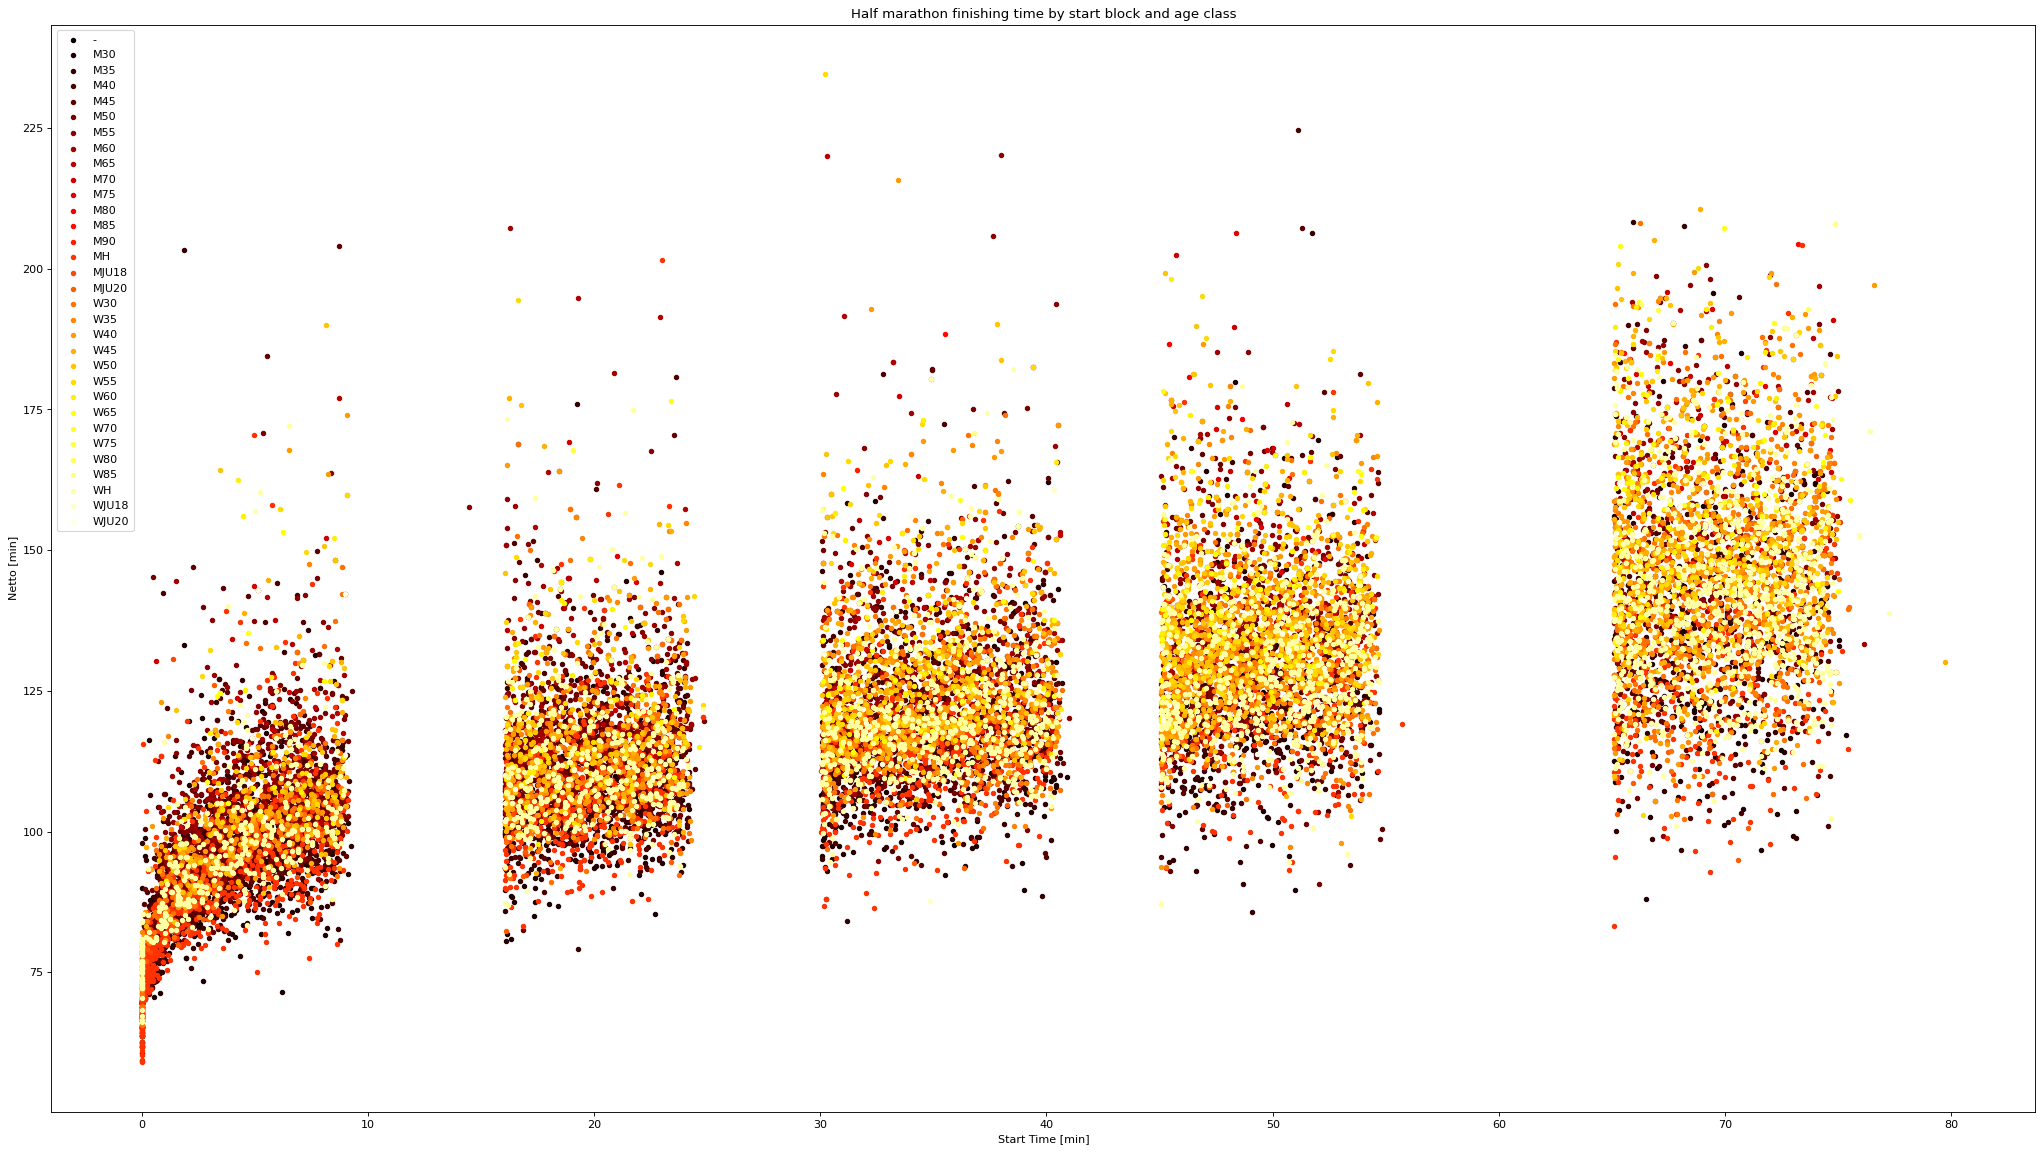

In [108]:
x = plotdf['Start Time']
y = plotdf['Netto']

uniq = sorted(list(set(plotdf['AK'])))

z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
fig, ax = plt.subplots(nrows=1,figsize=(32,18), dpi=80)
ax.xaxis.set_units("min")
ax.yaxis.set_units("min")

for i in range(len(uniq)):
    indx = df['AK'] == uniq[i]
    ax.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel(x.name + " [min]")
plt.ylabel(y.name + " [min]")

plt.title('Half marathon finishing time by start block and age class')
plt.legend(loc='upper left')
plt.show()


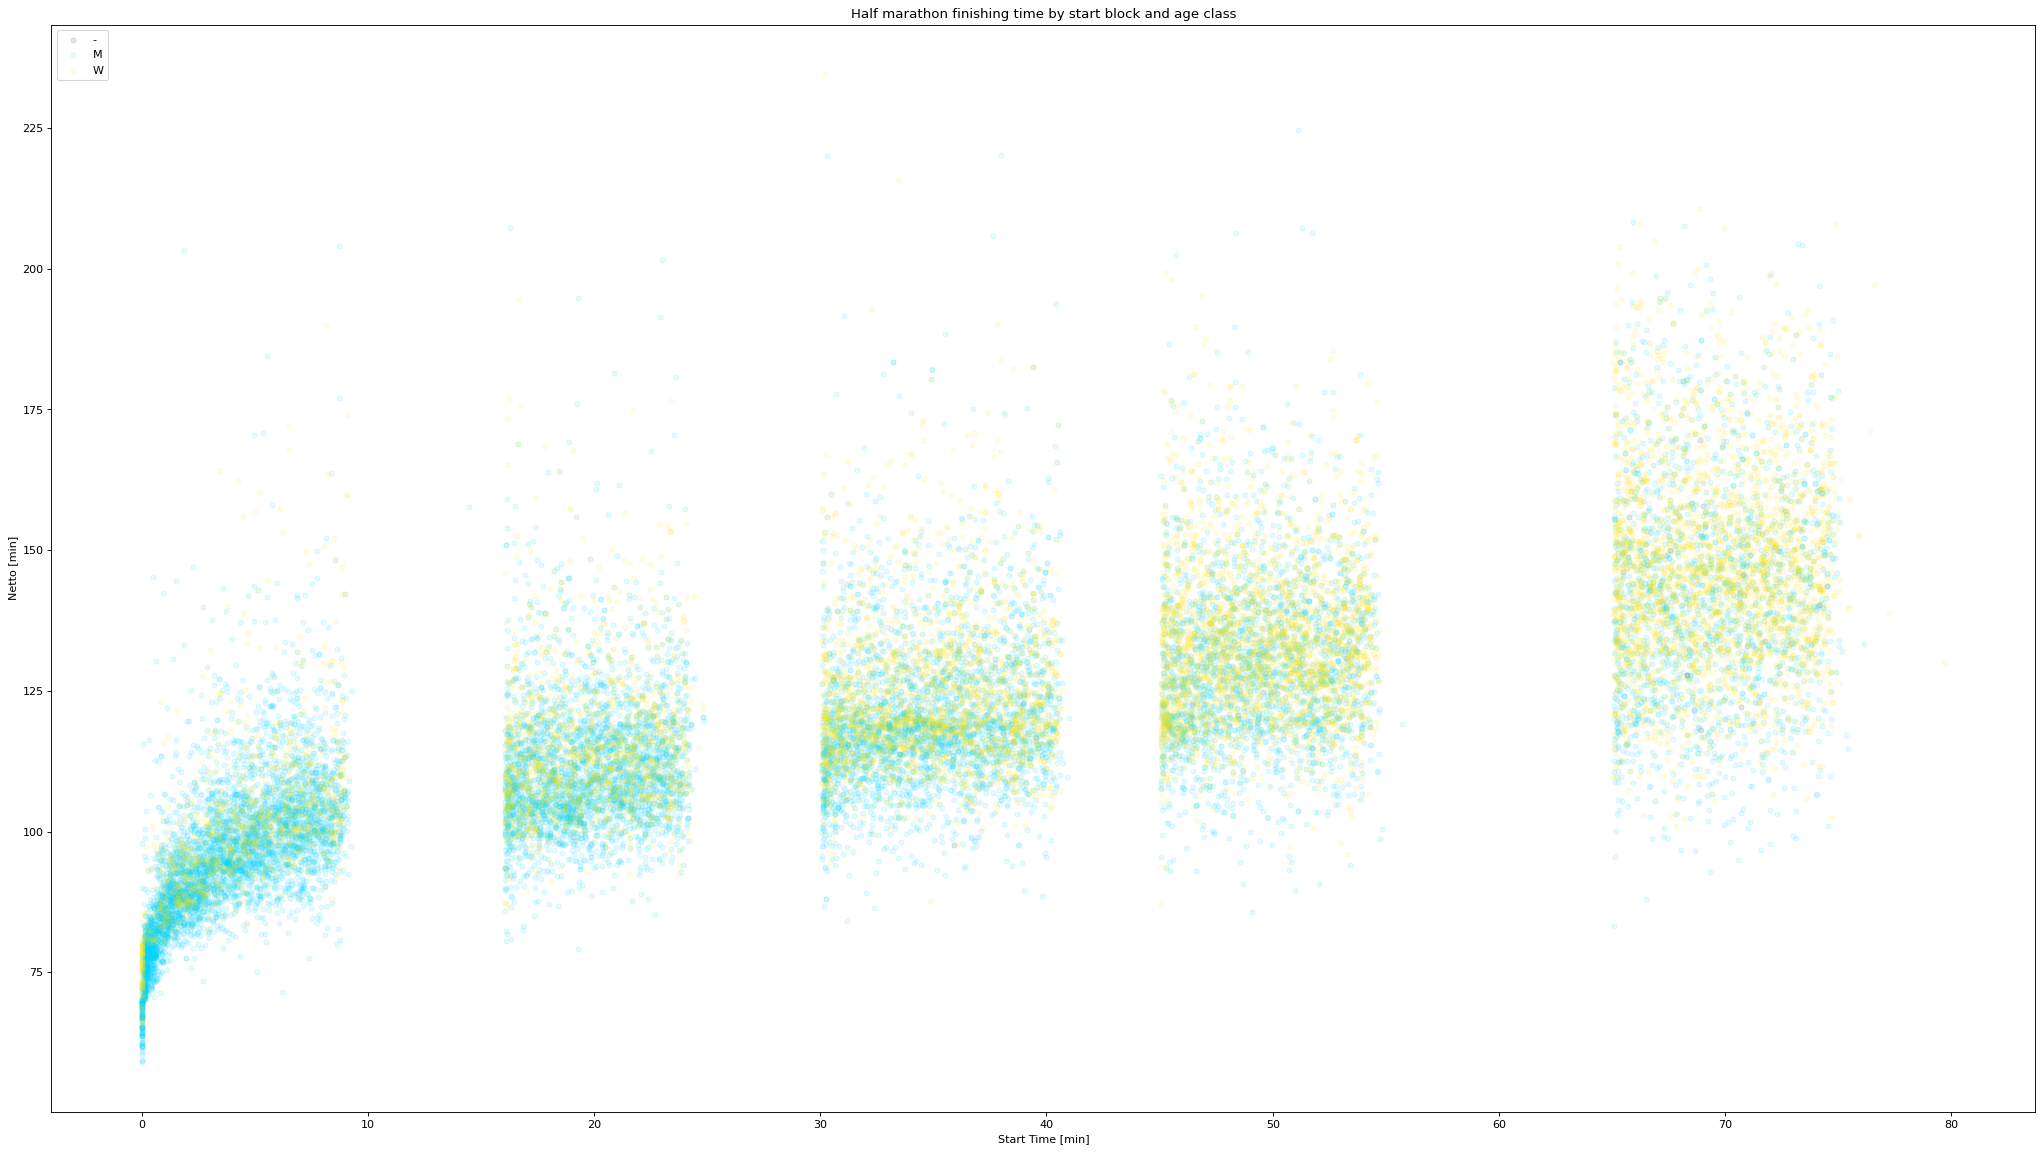

In [109]:

plotdf['G'] = plotdf['AK'].str.get(0)

x = plotdf['Start Time']
y = plotdf['Netto']

uniq = sorted(list(set(plotdf['G'])))

z = range(1,len(uniq))
cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig, ax = plt.subplots(nrows=1,figsize=(32,18), dpi=80)
ax.xaxis.set_units("min")
ax.yaxis.set_units("min")

# plotdf['Color'] = np.nan
# plotdf.loc[plotdf['AK'].str.startswith("M"), 'Color'] = 'red'
# plotdf.loc[plotdf['AK'].str.startswith("W"), 'Color'] = 'blue'
# plotdf = plotdf.dropna()

# ax.scatter(plotdf['Start Time'], plotdf['Netto'], color=plotdf['Color'])

# for i in reversed(range(len(uniq))):
for i in (range(len(uniq))):
    indx = plotdf['G'] == uniq[i]
    
    ax.scatter(x[indx], y[indx], s=20, color=scalarMap.to_rgba(i), label=uniq[i], marker='o', alpha=0.1)
    # ax.plot(x[indx].mean(), x[indx].mean(), ls='-', alpha = 1)

plt.xlabel(x.name + " [min]")
plt.ylabel(y.name + " [min]")

plt.title('Half marathon finishing time by start block and age class')
plt.legend(loc='upper left')
plt.show()


In [110]:
sizes = pd.Series(20, index=plotdf['Name'].index, dtype=float)

# sizes[plotdf['Name'].str.contains('Pfeifer, Jann')] = 2000
# sizes[plotdf['Name'].str.contains('Kegel, Leonie')] = 2000
# sizes[plotdf['Name'].str.contains('Arnold, Carina')] = 2000

sizes.groupby(sizes).count()


20.0    26103
dtype: int64

In [111]:
annotate_names = [
    'Kegel, Leonie',
    'Arnold, Carina',
    'Pfeifer, Jann'
]
annotate_df = plotdf[plotdf['Name'].str.contains('|'.join(annotate_names))] #.loc[:, ['Name', 'Start Time', 'Netto', 'Pace']]
annotate_df


Platz Pl.AK                  Name Startnr.  AK Verein       Netto  \
612     1451   546  Arnold, Carina (GER)    12626  WH      -  108.266667   
11063   5649  1764   Kegel, Leonie (GER)    23412  WH      -  130.183333   
17584  12501  2209   Pfeifer, Jann (GER)    30172  MH      -  130.700000   

           Brutto  G  Start Time      Pace  
612    155.466667  W        47.2  5.106918  
11063  180.183333  W        50.0  6.140723  
17584  180.700000  M        50.0  6.165094

612      Annotation(47.2, 108.267, 'Arnold, Carina (GER)')
11063       Annotation(50, 130.183, 'Kegel, Leonie (GER)')
17584         Annotation(50, 130.7, 'Pfeifer, Jann (GER)')
dtype: object

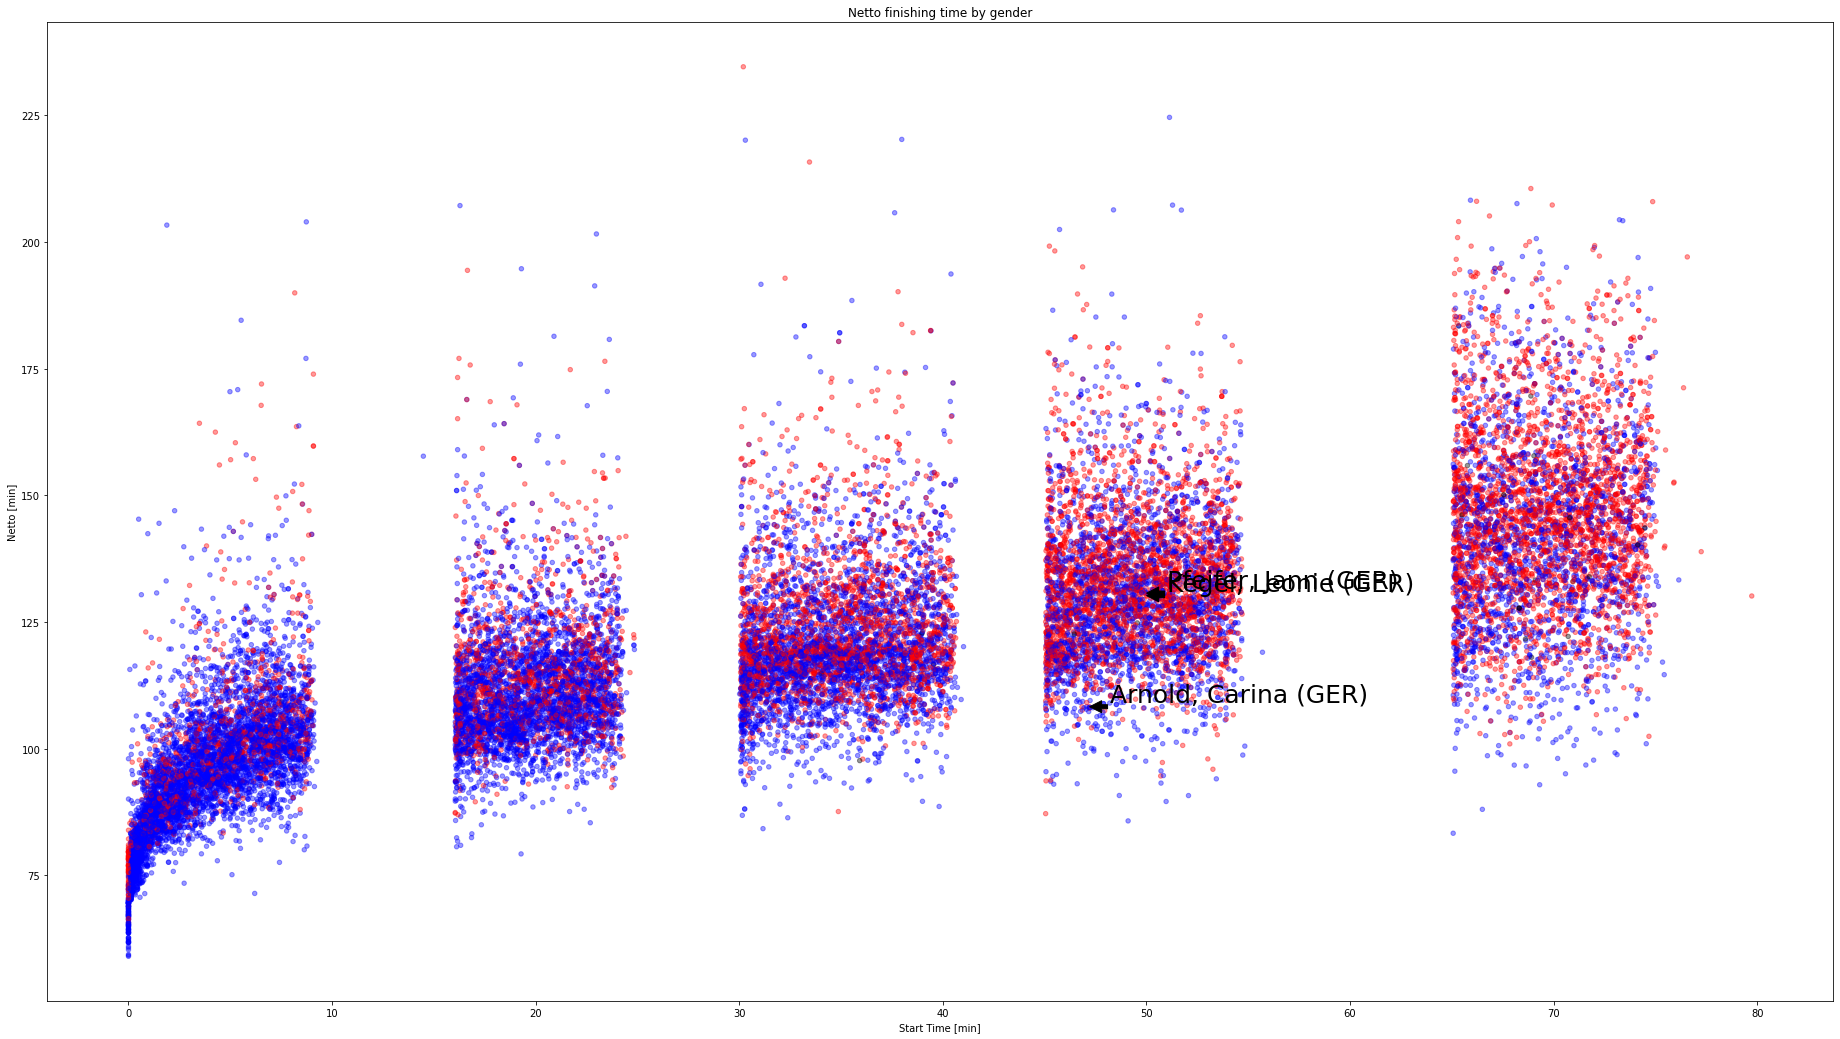

In [112]:
colors = plotdf['G'].replace({'M': 'blue', 'W': 'red', '-': 'black'})

plotdf.plot.scatter(
    'Start Time',
    'Netto',
    c=colors,
    s=list(sizes),
    figsize=(32, 18),
    alpha=0.4,
    xlabel='Start Time [min]',
    ylabel='Netto [min]',
    title='Netto finishing time by gender'
)

annotate_df.T.apply(lambda x:
                    plt.annotate(
                        x['Name'],
                        xy=(x['Start Time'], x['Netto']),
                        xytext=(x['Start Time'] + 1, x['Netto'] + 1),
                        color="black",
                        arrowprops={"facecolor": 'black', "shrink": 0.01},
                        size=25
                    ))


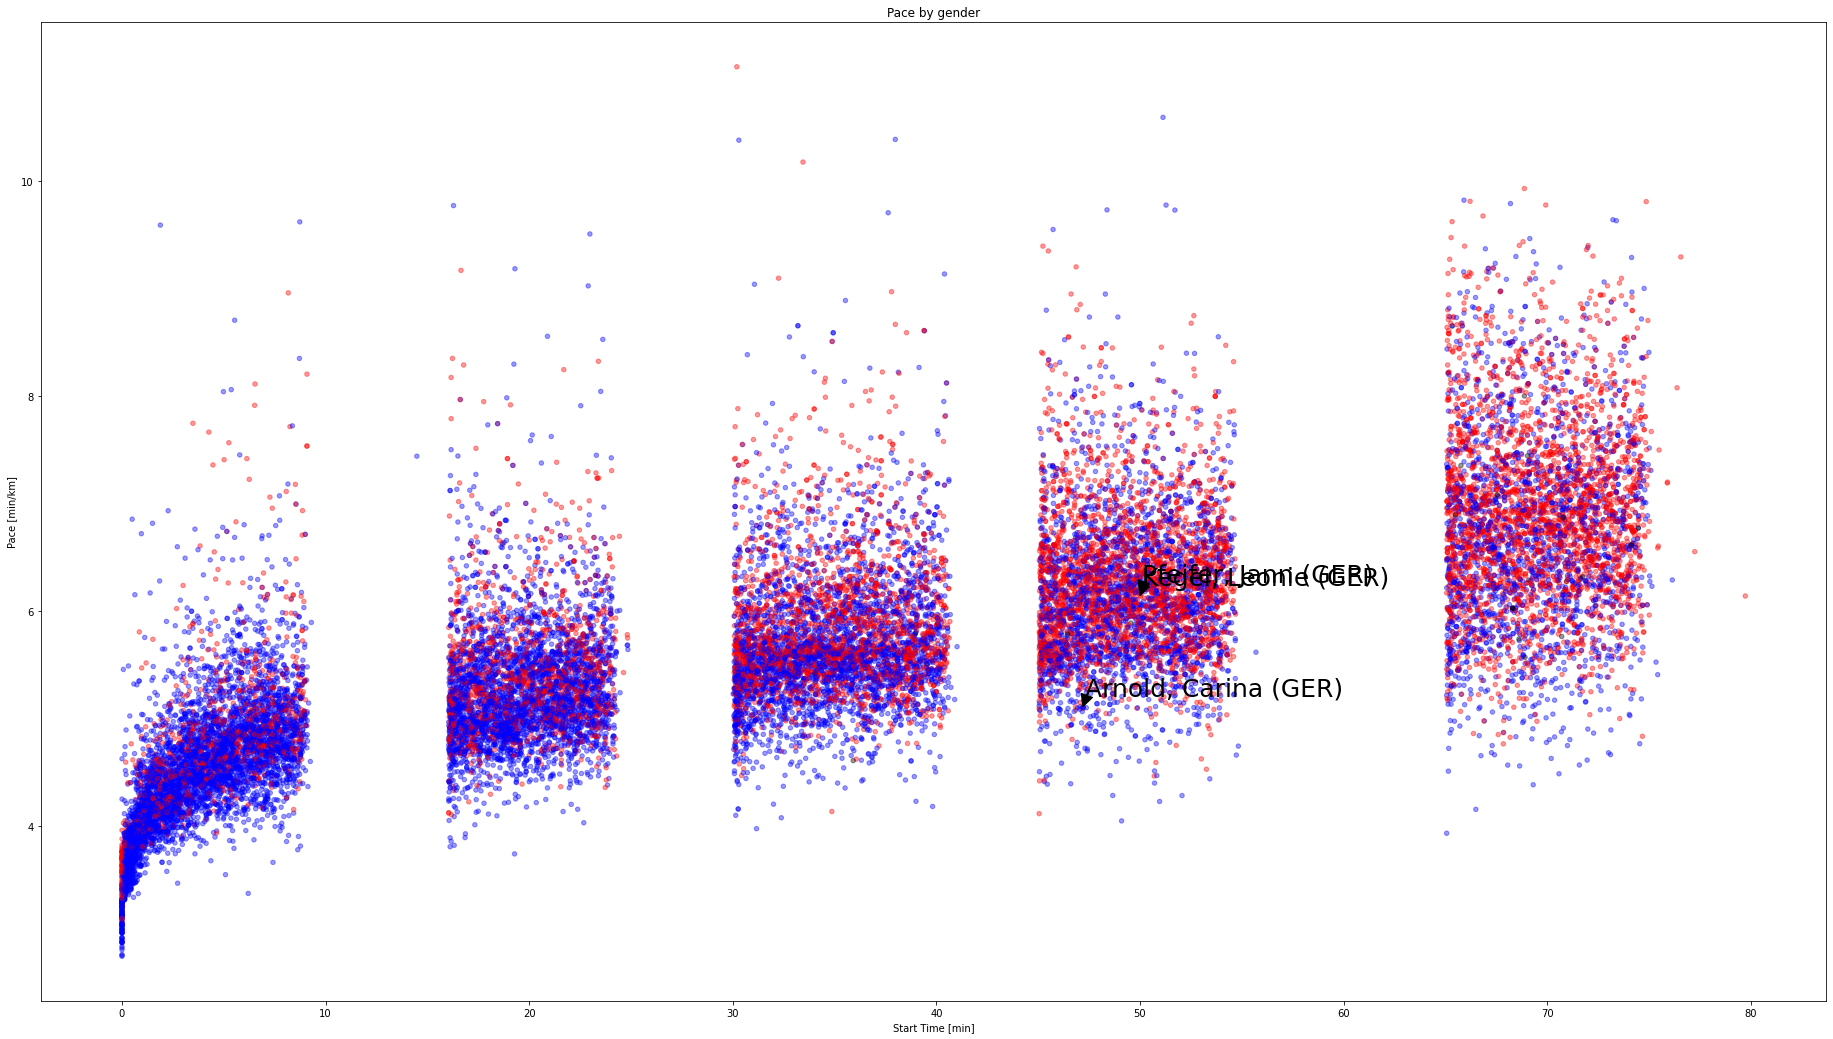

In [113]:
colors = plotdf['G'].replace({'M': 'blue', 'W': 'red', '-': 'black'})

plotdf.plot.scatter(
    'Start Time',
    'Pace',
    c=colors,
    s=list(sizes),
    figsize=(32, 18),
    alpha=0.4,
    xlabel='Start Time [min]',
    ylabel='Pace [min/km]',
    title='Pace by gender'
)

annotate_df.T.apply(lambda x:
                    plt.annotate(
                        x['Name'],
                        xy=(x['Start Time'], x['Pace']),
                        xytext=(x['Start Time'] + 0.1, x['Pace'] + 0.1),
                        color="black",
                        arrowprops={"facecolor": 'black', "shrink": 0.01},
                        size=25
                    ));


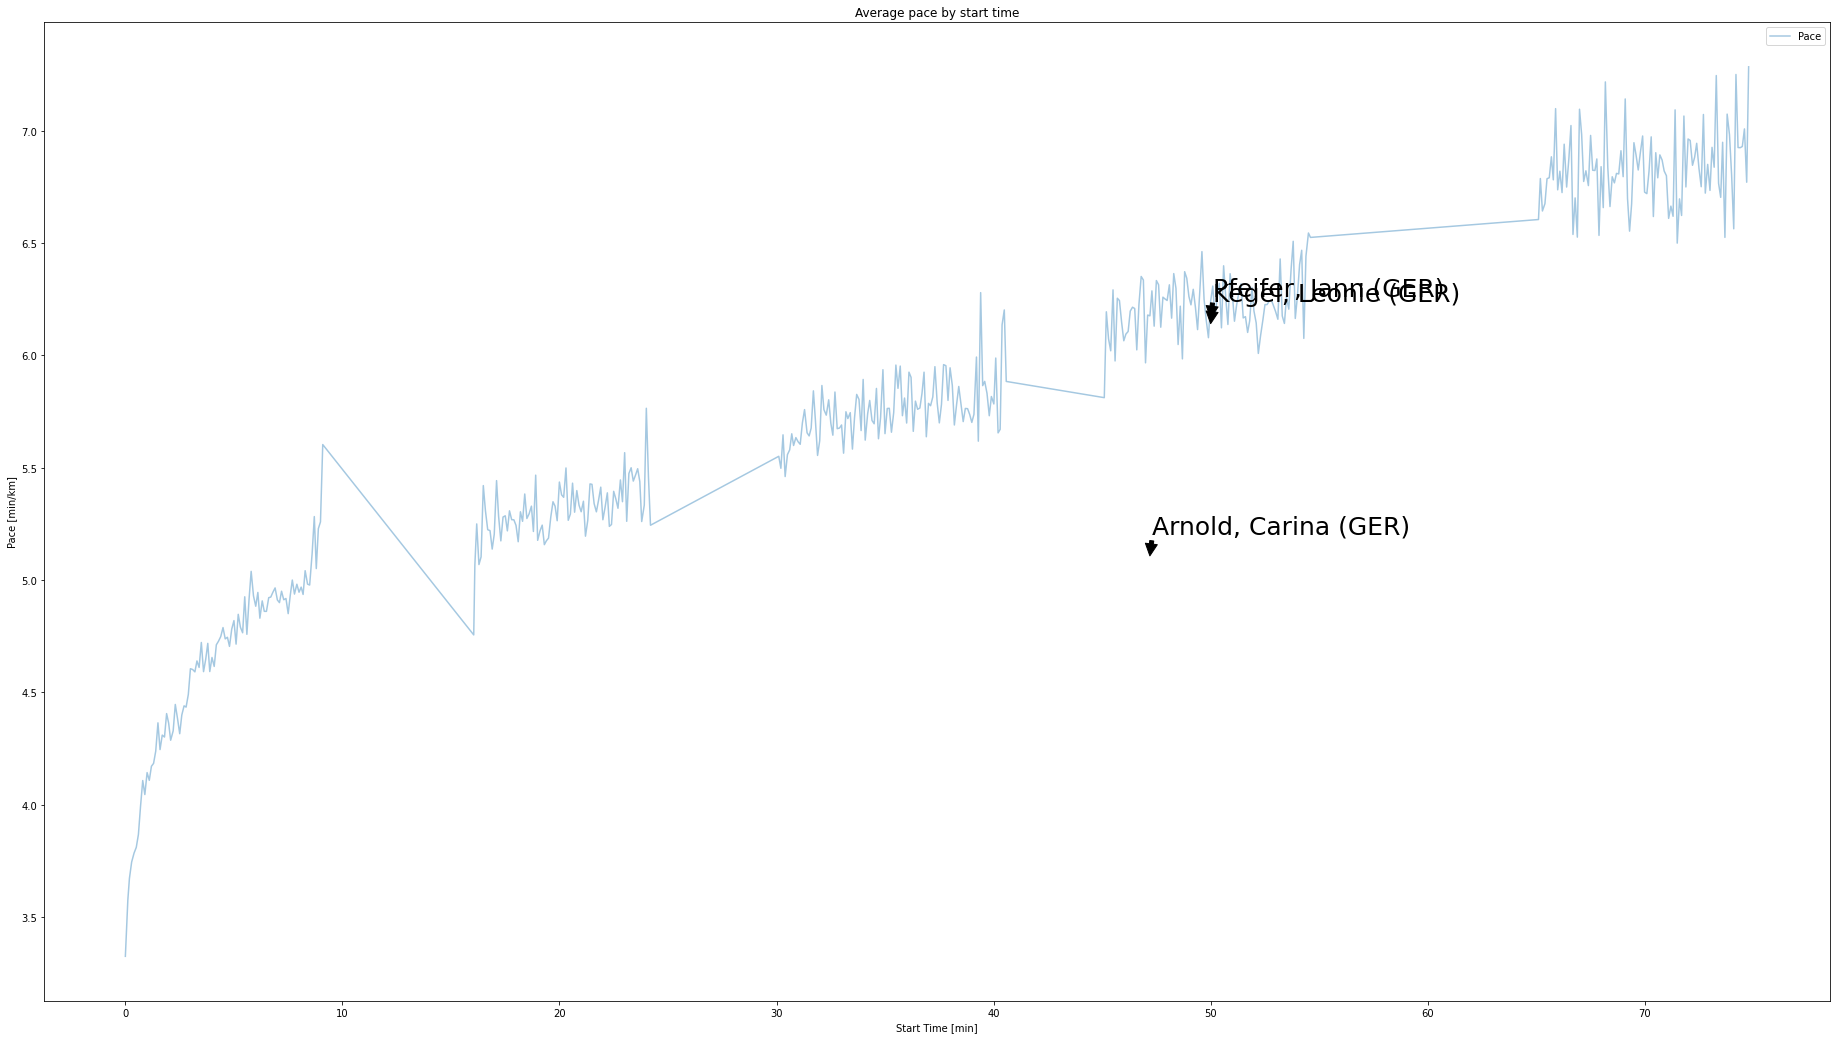

In [114]:
# colors = plotdf['G'].replace({'M': 'blue', 'W': 'red', '-': 'black'})

# unfortunately needs to be grouped 2x because filter combines the result
aggr = (plotdf
        .groupby(plotdf['Start Time'].apply(lambda x: np.round(x, 1)))
        .filter(lambda x: len(x) > 10)
        .groupby(plotdf['Start Time'].apply(lambda x: np.round(x, 1)))
        .aggregate('mean')
        )

aggr.plot(
    'Start Time',
    'Pace',
    figsize=(32, 18),
    alpha=0.4,
    xlabel='Start Time [min]',
    ylabel='Pace [min/km]',
    title='Average pace by start time'
)

annotate_df.T.apply(lambda x:
                    plt.annotate(
                        x['Name'],
                        xy=(x['Start Time'], x['Pace']),
                        xytext=(x['Start Time'] + 0.1, x['Pace'] + 0.1),
                        color="black",
                        arrowprops={"facecolor": 'black', "shrink": 0.01},
                        size=25
                    ));


612      Annotation(47.2, 5.10692, 'Arnold, Carina (GER)')
11063       Annotation(50, 6.14072, 'Kegel, Leonie (GER)')
17584       Annotation(50, 6.16509, 'Pfeifer, Jann (GER)')
dtype: object

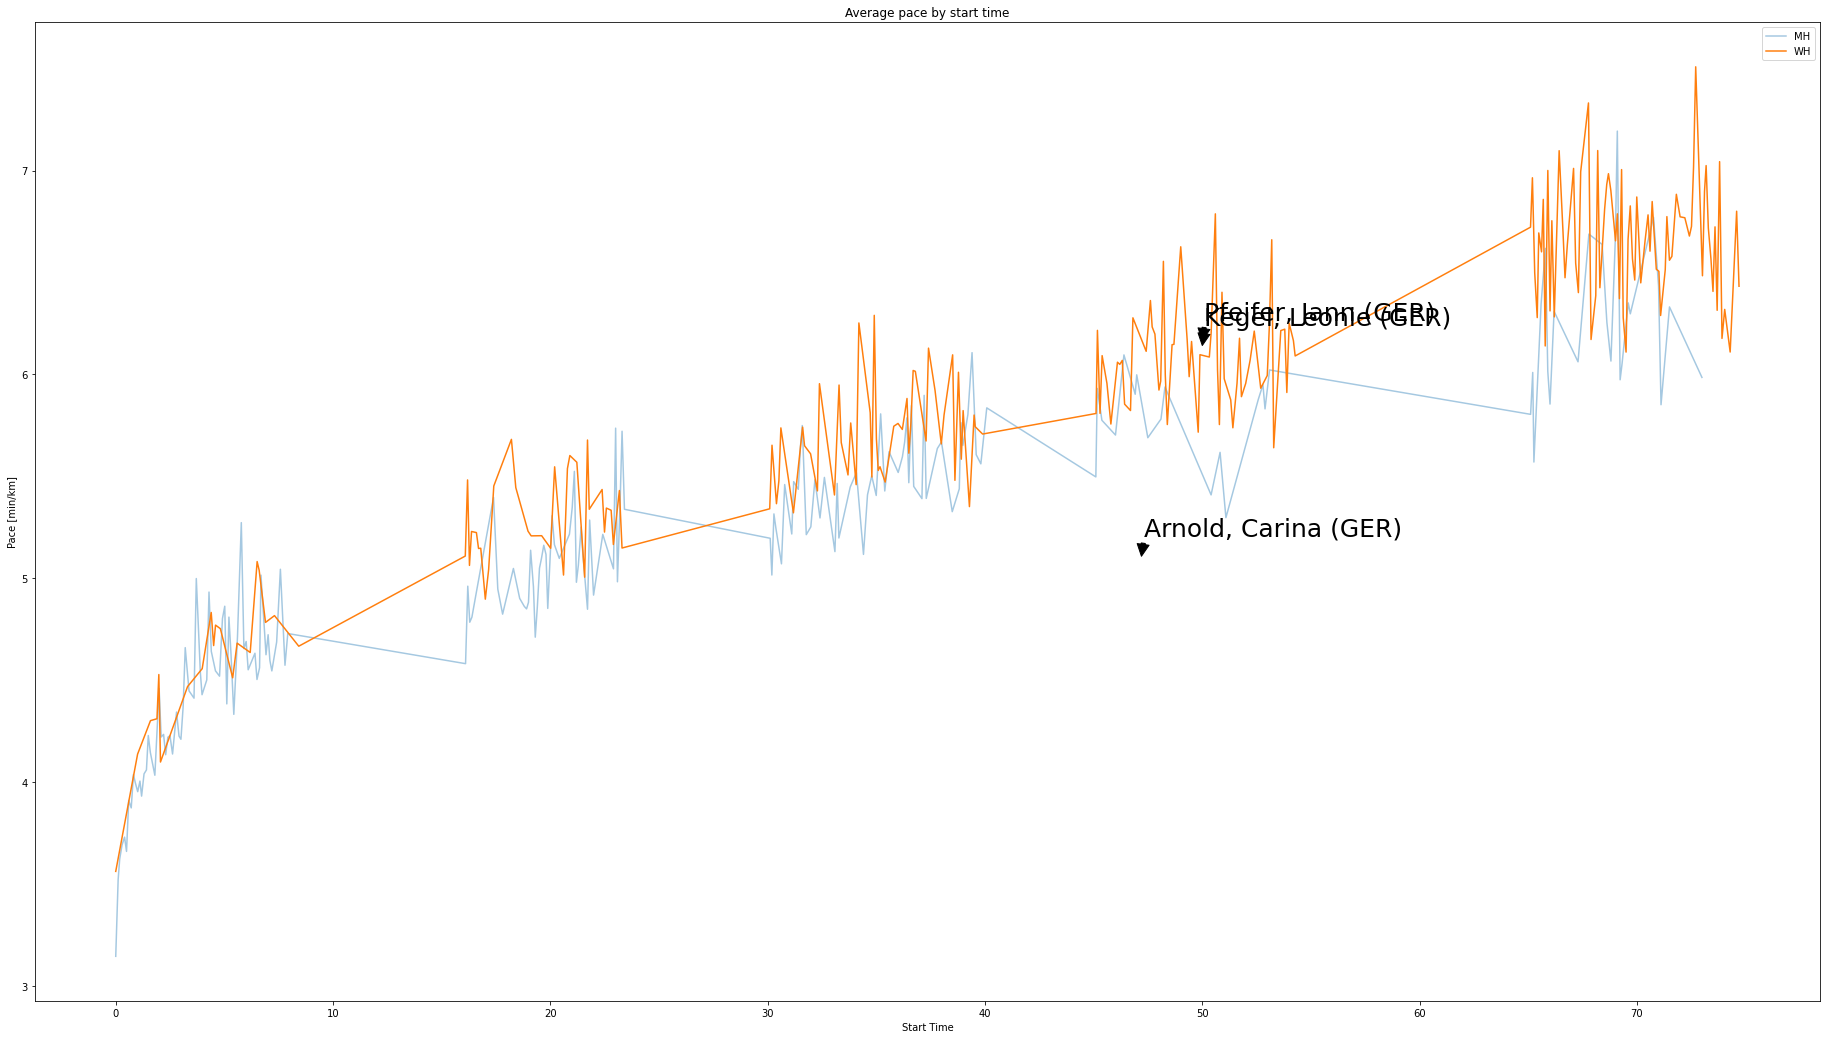

In [115]:
# unfortunately needs to be grouped 2x because filter combines the result
aggr = (plotdf
        .groupby(['AK', plotdf['Start Time'].apply(lambda x: np.round(x, 1))])
        .filter(lambda x: len(x) > 5)
        .groupby(['AK', plotdf['Start Time'].apply(lambda x: np.round(x, 1))])
        .aggregate('mean')
        )


ax = aggr.loc[('MH',), :].plot(
    'Start Time',
    'Pace',
    figsize=(32, 18),
    alpha=0.4,
    xlabel='Start Time [min]',
    ylabel='Pace [min/km]',
    title='Average pace by start time'
)
ax.legend(["MH"])

aggr.loc[('WH',), :].plot(
    'Start Time',
    'Pace',
    ax=ax
)
ax.legend(["MH", "WH"])

# aggr.loc[(['MH', 'WH'],), :].groupby(level=1).mean().plot(
#     'Start Time',
#     'Pace',
#     ax=ax
# )
# ax.legend(["MH", "WH", 'H'])

annotate_df.T.apply(lambda x:
                    plt.annotate(
                        x['Name'],
                        xy=(x['Start Time'], x['Pace']),
                        xytext=(x['Start Time'] + 0.1, x['Pace'] + 0.1),
                        color="black",
                        arrowprops={"facecolor": 'black', "shrink": 0.01},
                        size=25
                    ))


612      Annotation(30, 108.267, 'Arnold, Carina (GER)')
11063     Annotation(30, 130.183, 'Kegel, Leonie (GER)')
17584       Annotation(15, 130.7, 'Pfeifer, Jann (GER)')
dtype: object

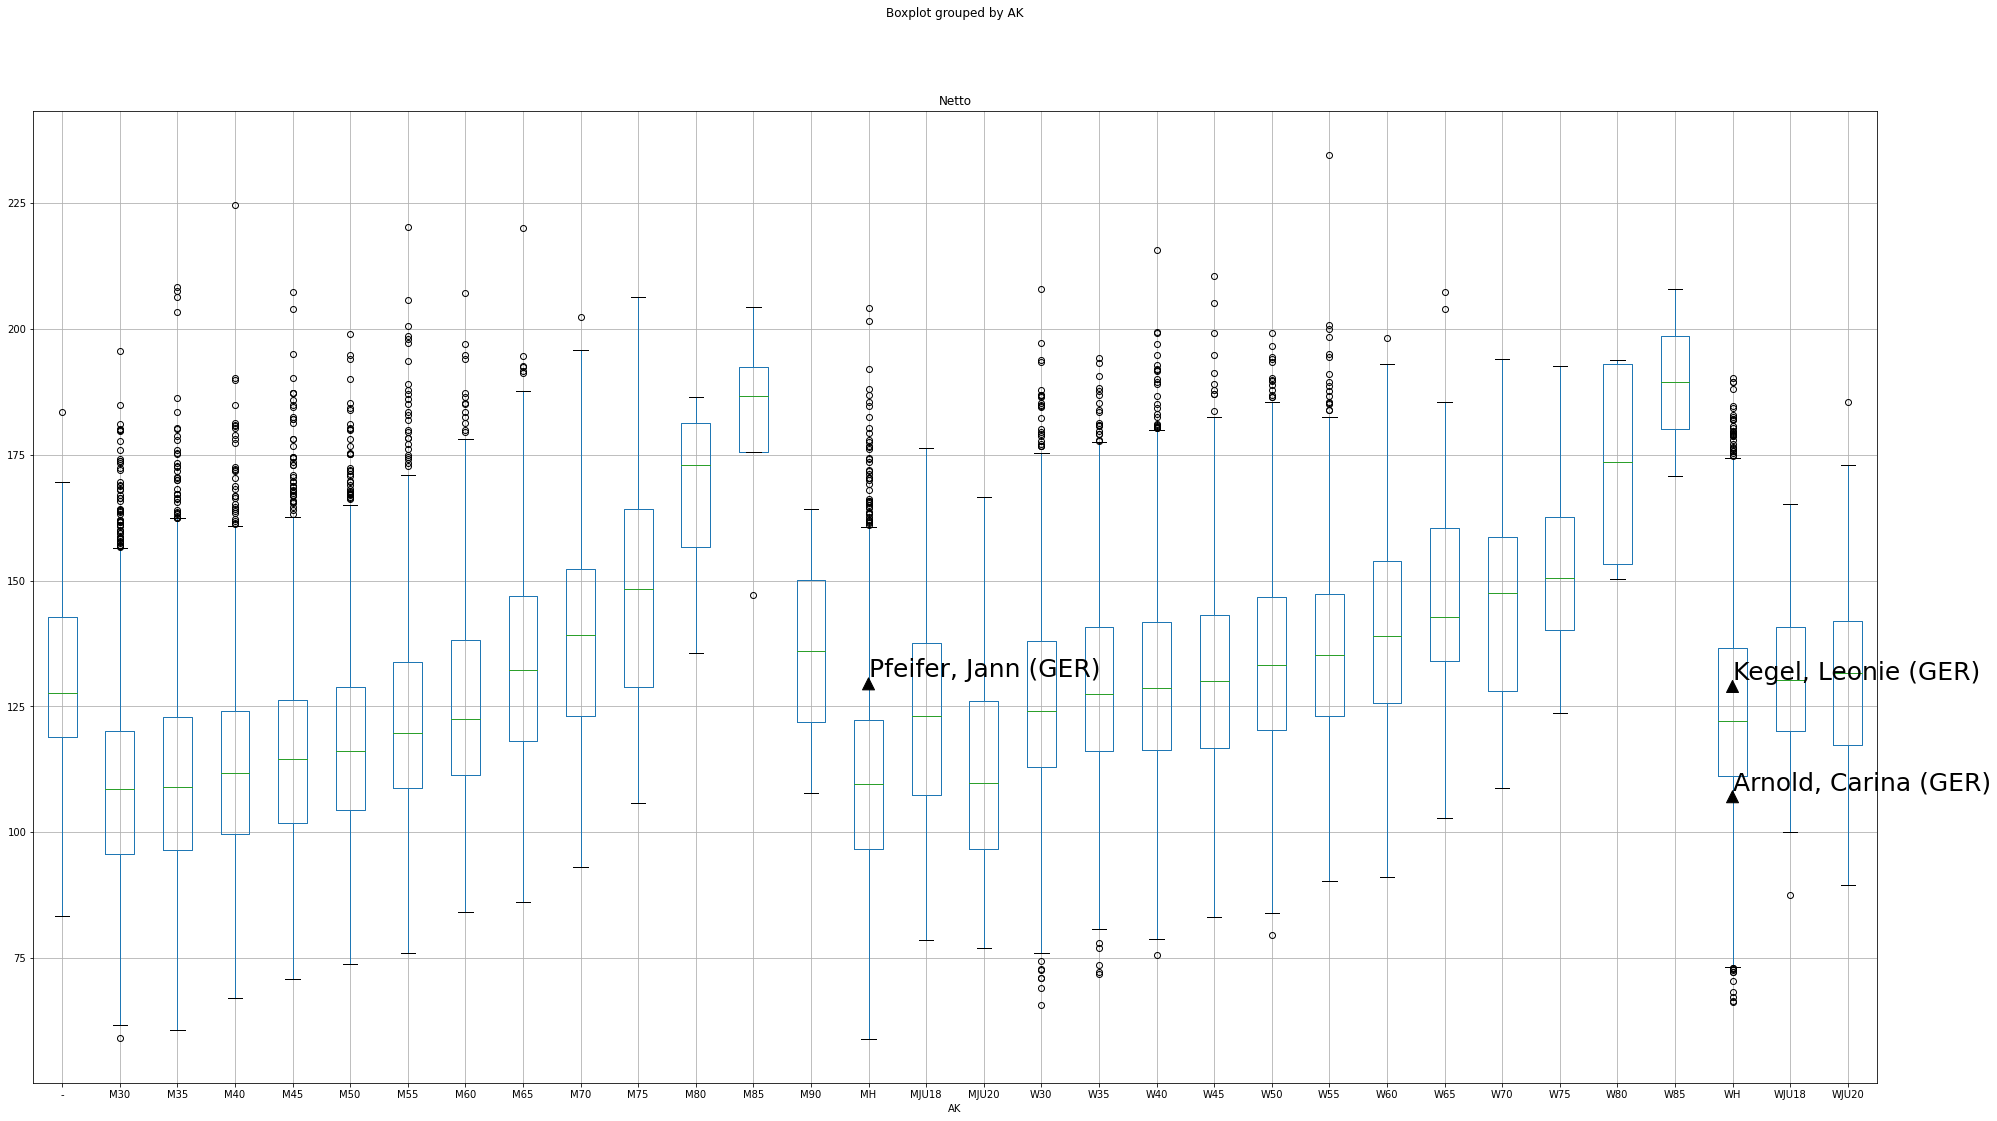

In [116]:
ax = plotdf.sort_values(by='AK').boxplot('Netto', by='AK', figsize=(32, 18))

tlabels = ax.get_xticklabels()
tick_labels = {x.get_text(): x.get_position()[0] for x in list(tlabels)}

annotate_df.T.apply(lambda x:
                    plt.annotate(
                        x['Name'],
                        xy=(tick_labels[x['AK']], x['Netto']),
                        xytext=(tick_labels[x['AK']], x['Netto'] + 0.1),
                        color="black",
                        arrowprops={"facecolor": 'black', "shrink": 0.01},
                        size=25
                    ))


612      Annotation(1, 108.267, 'Arnold, Carina (GER)')
11063     Annotation(1, 130.183, 'Kegel, Leonie (GER)')
17584       Annotation(1, 130.7, 'Pfeifer, Jann (GER)')
dtype: object

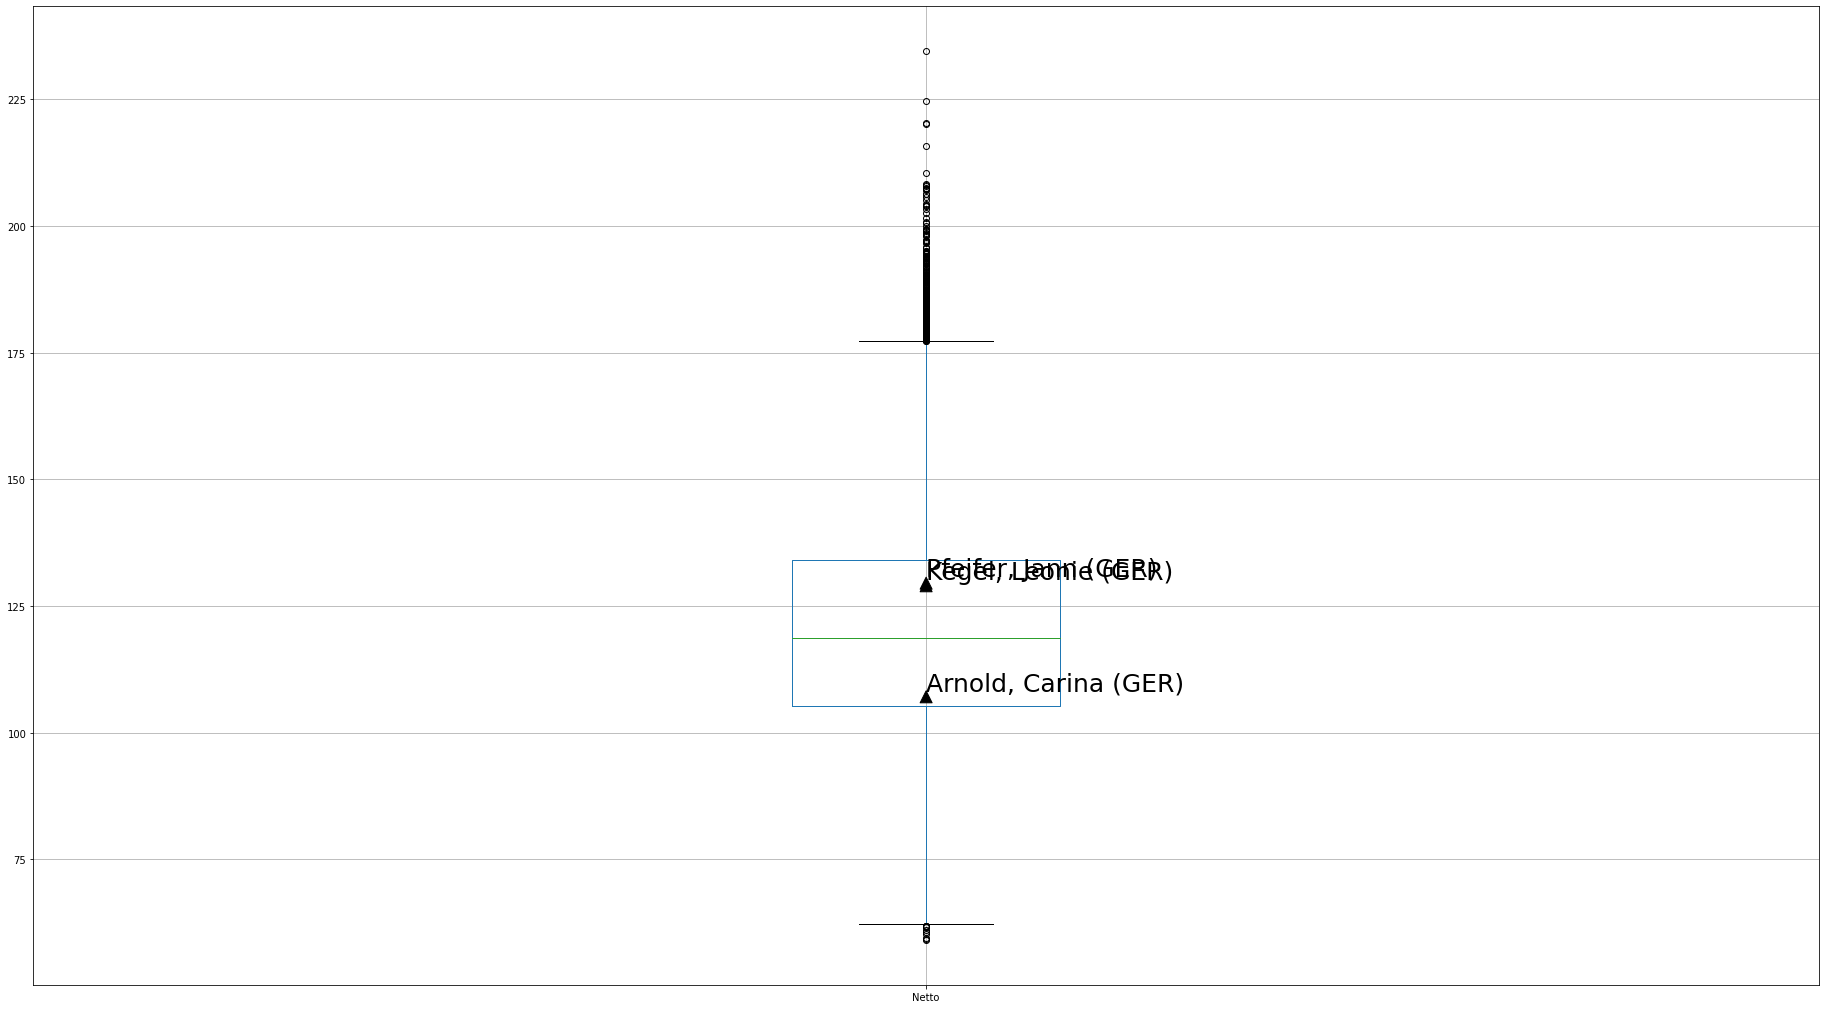

In [117]:
ax = plotdf.sort_values(by='AK').boxplot('Netto', figsize=(32, 18))

annotate_df.T.apply(lambda x:
                    plt.annotate(
                        x['Name'],
                        xy=(1, x['Netto']),
                        xytext=(1, x['Netto'] + 0.1),
                        color="black",
                        arrowprops={"facecolor": 'black', "shrink": 0.01},
                        size=25
                    ))


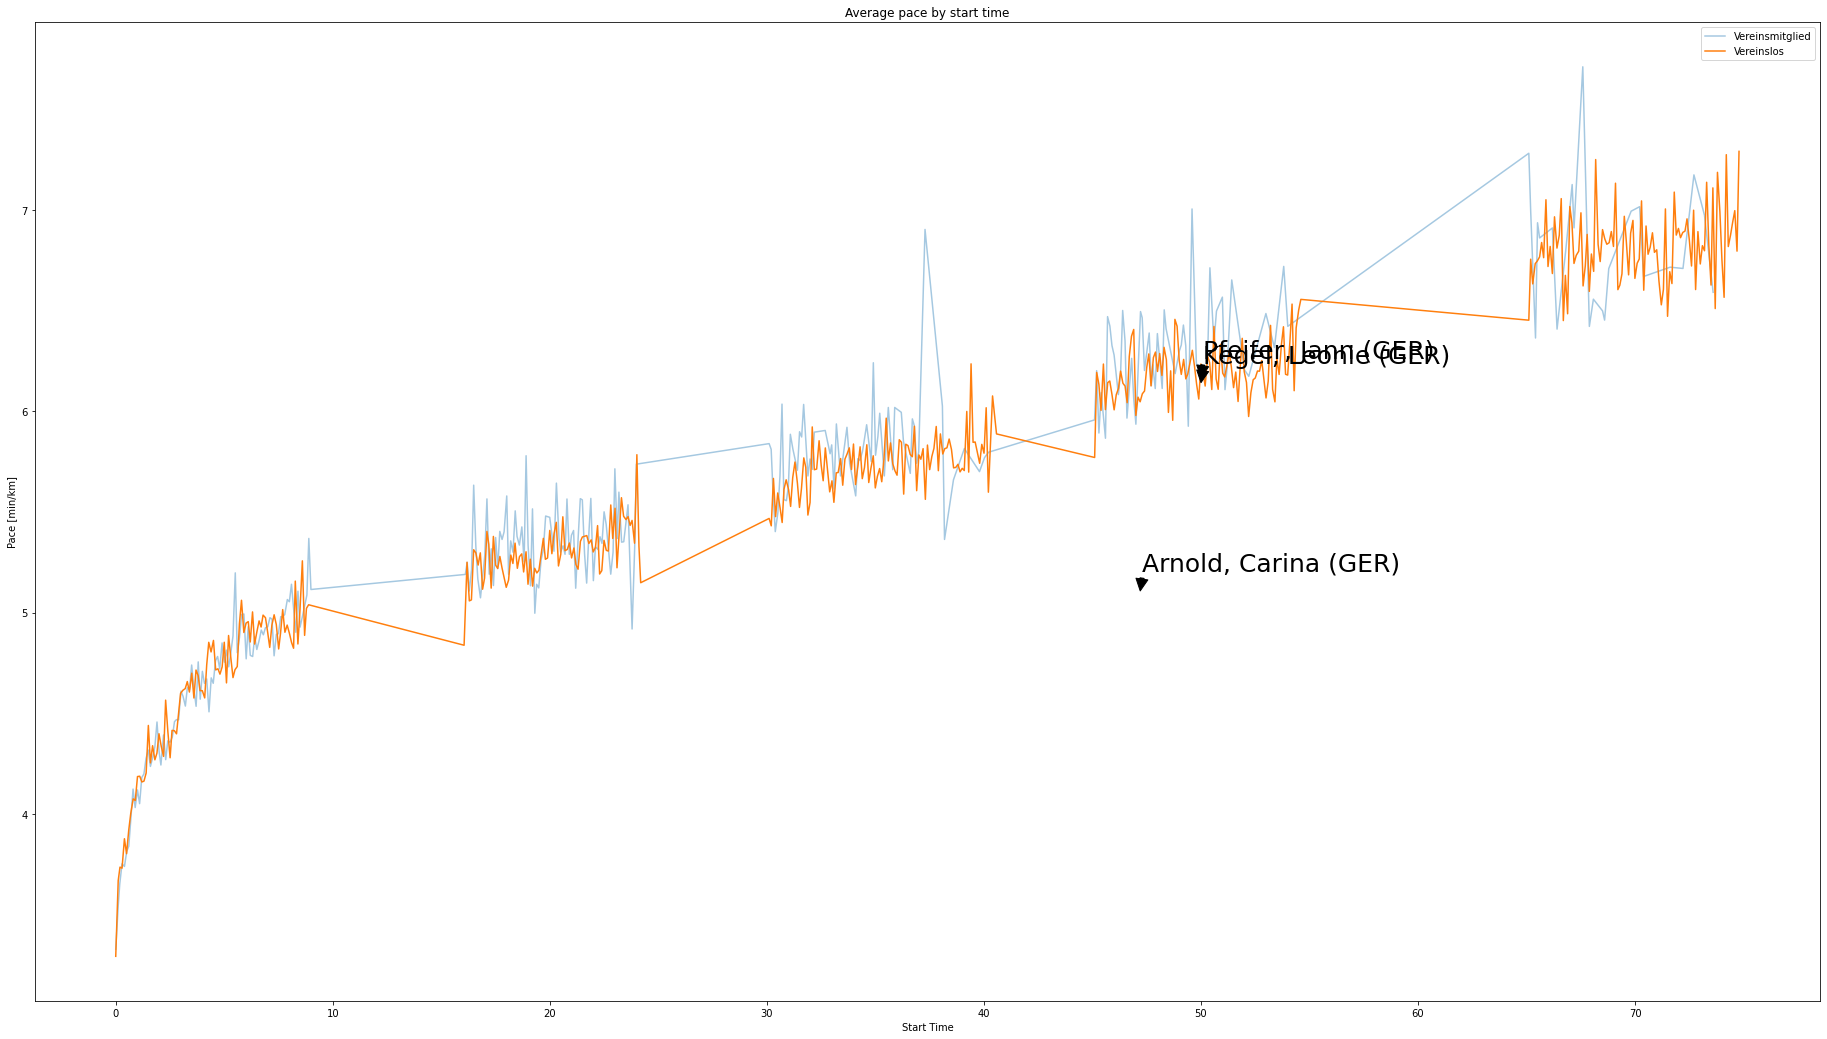

In [118]:
# colors = plotdf['G'].replace({'M': 'blue', 'W': 'red', '-': 'black'})

# unfortunately needs to be grouped 2x because filter combines the result
plotdf['hasVerein'] = (plotdf['Verein'] != '-')
aggr = (plotdf
        .groupby(['hasVerein', plotdf['Start Time'].apply(lambda x: np.round(x, 1))])
        .filter(lambda x: len(x) > 10)
        .groupby(['hasVerein', plotdf['Start Time'].apply(lambda x: np.round(x, 1))])
        .aggregate('mean')
        )

ax = aggr.loc[(True,),:].plot(
    'Start Time',
    'Pace',
    figsize=(32, 18),
    alpha=0.4,
    xlabel='Start Time [min]',
    ylabel='Pace [min/km]',
    title='Average pace by start time'
)

ax = aggr.loc[(False,),:].plot(
    'Start Time',
    'Pace',
    ax=ax
)
ax.legend(['Vereinsmitglied', 'Vereinslos'])

annotate_df.T.apply(lambda x:
                    plt.annotate(
                        x['Name'],
                        xy=(x['Start Time'], x['Pace']),
                        xytext=(x['Start Time'] + 0.1, x['Pace'] + 0.1),
                        color="black",
                        arrowprops={"facecolor": 'black', "shrink": 0.01},
                        size=25
                    ));


(166981132075.0, 576981132075.0)

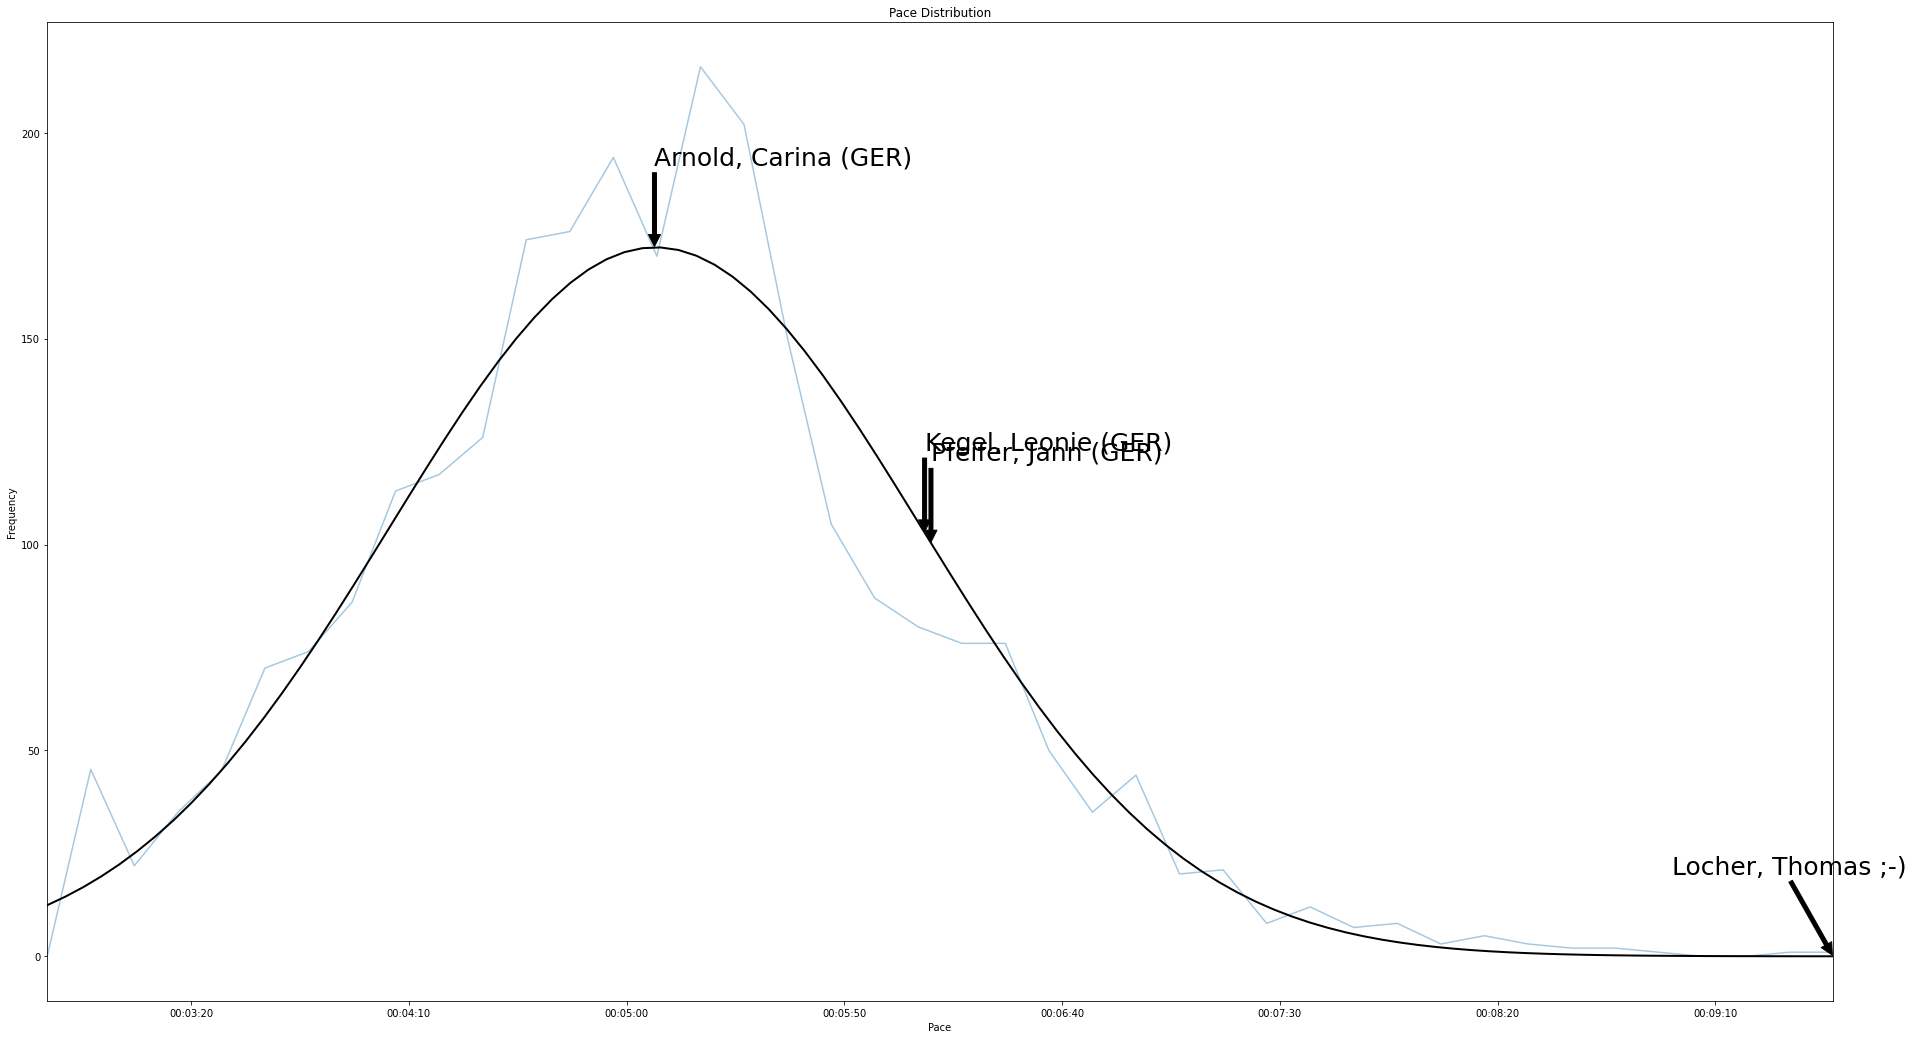

In [119]:
df_mh = df[df['AK'] == 'MH']

pace_distr = df_mh.set_index('Pace').resample('10s').count().T.mean()

ax = pace_distr.plot(
    figsize=(32, 18),
    alpha=0.4,
    xlabel='Pace',
    ylabel='Frequency',
    title='Pace Distribution')

total = []
for i, r in pace_distr.items():
    total += int(r) * [i.total_seconds()]

mu = np.mean(total)
std = np.std(total)

xmin = pace_distr.index.min().total_seconds()
xmax = pace_distr.index.max().total_seconds()

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) * df.shape[0]


ax.plot(pd.to_timedelta(x, 's'), p, 'k', linewidth=2)
ax.get_xlim()
annotate_df.T.apply(lambda x:
                    ax.annotate(
                        x['Name'],
                        xy=(x['Pace'] * 60 * 1e9,
                            norm.pdf(x['Pace'] * 60, mu, std) * df.shape[0]),
                        xytext=(x['Pace'] * 60 * 1e9, norm.pdf(x['Pace']
                                * 60, mu, std) * df.shape[0] + 20),
                        color="black",
                        arrowprops={"facecolor": 'black', "shrink": 0.01},
                        size=25
                    ))

t_pace = pd.to_timedelta('9T').total_seconds() / 60

ax.annotate(
    'Locher, Thomas ;-)',
    xy=(
        576981132075.0, # t_pace * 60 * 1e9,
        norm.pdf(t_pace * 60, mu, std) * df.shape[0]
    ),
    xytext=(t_pace * 60 * 1e9, norm.pdf(t_pace *
            60, mu, std) * df.shape[0] + 20),
    color="black",
    arrowprops={"facecolor": 'black', "shrink": 0.01},
    size=25
)
ax.get_xlim()
